In [116]:
import math
import cv2
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline

def segment(img, ks=11, s=7, theta=7, minArea=0):
    kernel = create_kernel(ks, s, theta)
    imgFiltered = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_REPLICATE).astype(np.uint8)
    _, thresh = cv2.threshold(imgFiltered, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    thresh = 255 - thresh

    _, find, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    res = []
    for f in find:
        if cv2.contourArea(f) < minArea:
            continue

        currBox = cv2.boundingRect(f)
        (x, y, w, h) = currBox
        currImg = img[y:y+h, x:x+w]
        res.append((currBox, currImg))

    return sorted(res, key=lambda entry:entry[0][0])

def read_img(img, height):
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    h = img.shape[0]
    factor = height / h
    return cv2.resize(img, dsize=None, fx=factor, fy=factor)

def create_kernel(ks, s, theta):
    assert ks & 2
    halfSize = ks // 2

    kernel = np.zeros([ks, ks])
    sigmaX = s
    sigmaY = s * theta

    for i in range(ks):
        for j in range(ks):
            x = i - halfSize
            y = j - halfSize

            expTerm = np.exp(-x**2 / (2 * sigmaX) - y**2 / (2 * sigmaY))
            xTerm = (x**2 - sigmaX**2) / (2 * math.pi * sigmaX**5 * sigmaY)
            yTerm = (y**2 - sigmaY**2) / (2 * math.pi * sigmaY**5 * sigmaX)

            kernel[i, j] = (xTerm + yTerm) * expTerm

    kernel = kernel / np.sum(kernel)
    return kernel

In [117]:
def main(img):
    res = segment(img, ks=11, s=11, theta=7, minArea=10)
    for (j, w) in enumerate(res):
        (wordBox, wordImg) = w
        (x, y, w, h) = wordBox
        cv2.rectangle(img,(x,y),(x+w,y+h),0,1)
    return img

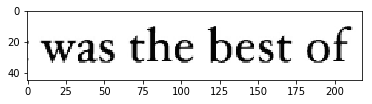

In [118]:
img = read_img(cv2.imread('./misc/figure-65.png'), 200)[:45, 30:-70]
plt.imshow(img, cmap='gray')

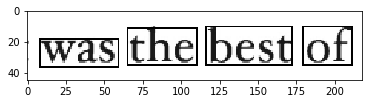

In [119]:
res = main(img)
plt.imshow(res, cmap='gray')

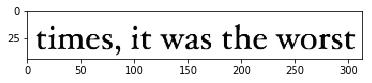

In [120]:
img = read_img(cv2.imread('./misc/figure-65.png'), 200)[35:80, :-5]
plt.imshow(img, cmap='gray')

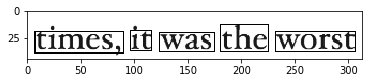

In [121]:
res = main(img)
plt.imshow(res, cmap='gray')